https://signate.jp/competitions/141

In [30]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

## 観光宿泊者学習データ
全8国立公園（阿寒摩周国立公園、十和田八幡平国立公園、日光国立公園、伊勢志摩国立公園、
大山隠岐国立公園、阿蘇くじゅう国立公園、霧島錦江湾国立公園、慶良間諸島国立公園）の2015/01/01～2016/12/31までの観光宿泊者数データ。

In [31]:
df_train = pd.read_csv('../data/raw/train.tsv',sep='\t')
print('-- 行・列数 --')
print(df_train.shape)
print('------------')
print('-- カラム --')
print(df_train.columns)
print('------------')
print('-- データの概要 --')
print(df_train.info())
print('------------')
print('-- 欠損値の数 --')
print(df_train.isnull().sum())
print('------------')
print('-- 要約統計量 --')
print(df_train.describe())
print('------------')

-- 行・列数 --
(5848, 3)
------------
-- カラム --
Index(['datetime', 'park', 'visitors'], dtype='object')
------------
-- データの概要 --
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5848 entries, 0 to 5847
Data columns (total 3 columns):
datetime    5848 non-null object
park        5848 non-null object
visitors    5848 non-null int64
dtypes: int64(1), object(2)
memory usage: 137.1+ KB
None
------------
-- 欠損値の数 --
datetime    0
park        0
visitors    0
dtype: int64
------------
-- 要約統計量 --
           visitors
count   5848.000000
mean    7186.736149
std     8791.087517
min        0.000000
25%      346.000000
50%     4214.500000
75%    11103.750000
max    87008.000000
------------


In [32]:
df_train.head(16)

,datetime,park,visitors
0,2015-01-01,阿寒摩周国立公園,11028
1,2015-01-01,十和田八幡平国立公園,34757
2,2015-01-01,日光国立公園,29714
3,2015-01-01,伊勢志摩国立公園,42652
4,2015-01-01,大山隠岐国立公園,3637
5,2015-01-01,阿蘇くじゅう国立公園,1369
6,2015-01-01,霧島錦江湾国立公園,35352
7,2015-01-01,慶良間諸島国立公園,151
8,2015-01-02,阿寒摩周国立公園,11153
9,2015-01-02,十和田八幡平国立公園,33795


Text(0.5,1,'No of Visitors')

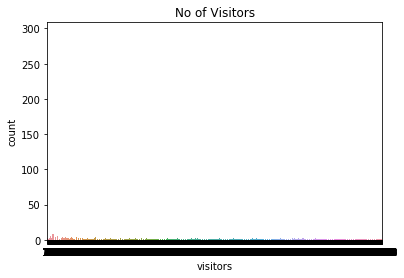

In [33]:
import  seaborn  as  sns
df_train.head(16)
#print(df_train.columns)
sns.countplot(x='visitors',  data=df_train)
plt.title('No of Visitors')

伊勢志摩国立公園、日光国立公園、霧島錦江湾国立公園の訪問者数が多い

In [ ]:
# Feature engineering from datetime
# https://adtech.cyberagent.io/techblog/archives/259
# https://note.nkmk.me/python-pandas-datetime-timestamp/
df_train['datetime'] = pd.to_datetime(df_train['datetime']) # dtypeをdatetime64に変換
df_train['year'] = df_train['datetime'].dt.year
df_train['month'] = df_train['datetime'].dt.month
df_train['day'] = df_train['datetime'].dt.day
df_train['dayofweek'] = df_train['datetime'].dt.dayofweek
df_train.head()

In [ ]:
## categorize park column
labels, uniques = pd.factorize(df_train['park'])
df_train['park'] = labels
df_train.head(16)

In [ ]:
df_train['park'].unique()

In [ ]:
# label encoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_train['park'])
le.transform(['阿寒摩周国立公園', '十和田八幡平国立公園', '日光国立公園', '伊勢志摩国立公園','大山隠岐国立公園','阿蘇くじゅう国立公園', '霧島錦江湾国立公園', '慶良間諸島国立公園']) 

In [ ]:
# onehot vector for park column
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
park_onehot = encoder.fit_transform(df_train['park'])
park_onehot
df_park = pd.DataFrame(park_onehot,columns=le.classes_)
df_train = pd.concat([df_train,df_park],axis=1)
df_train

In [ ]:
# visitor数降順
df_train.sort_values('visitors',ascending=False)

日付ごとの平均 visitor数は、GWと年末年始が多い
単純に休日フラグをつけたデータが欲しいかも

In [ ]:
# 日付ごとの平均 visitor数
df_train.groupby('datetime').mean().sort_values('visitors',ascending=False)

## 予測対象データ（test.tsv）
全8国立公園（阿寒摩周国立公園、十和田八幡平国立公園、日光国立公園、伊勢志摩国立公園、大山隠岐国立公園、阿蘇くじゅう国立公園、霧島錦江湾国立公園、慶良間諸島国立公園）の2017/01/01～2017/12/31までの予測対象データ。  
予測対象なのでtrainデータと異なり、visitorsカラムが無い。
  
※indexは予測結果投稿時に必要となります。応募用サンプルファイルの説明もご参照ください。

In [ ]:
df_test = pd.read_csv('../data/raw/test.tsv',sep='\t')
df_test['datetime'] = pd.to_datetime(df_test['datetime']) # dtypeをdatetime64に変換
df_test['year'] = df_test['datetime'].dt.year
df_test['month'] = df_test['datetime'].dt.month
df_test['day'] = df_test['datetime'].dt.day
df_test['dayofweek'] = df_test['datetime'].dt.dayofweek

#labels, uniques = pd.factorize(df_test['park'])
#df_test['park'] = labels

# onehot vector for park column
encoder = LabelBinarizer()
park_onehot_test = encoder.fit_transform(df_test['park'])
df_park_test = pd.DataFrame(park_onehot_test,columns=le.classes_)
df_test = pd.concat([df_test,df_park_test],axis=1)
df_test.head(16)

## SNSデータ（hotlink.tsv）
観光及び国立公園に関連する語句が含まれる投稿の2015/01/01～2017/12/30までの日別件数（ブログ・twitter・掲示板）データ。

In [ ]:
df_hotlink = pd.read_csv('../data/raw/hotlink.tsv',sep='\t')
print(df_hotlink.shape)
df_hotlink.head(10)

## ロケーション付SNSデータ（nightley.tsv）
日光国立公園区画内のSNSロケーション解析データ投稿数データ。  
※１ 本データは日光国立公園区画内のみ含まれています。  
※２ データ期間は2016/01/01～2017/12/30までです。

日本人と外国人のカウント数がある。

In [ ]:
df_nightley = pd.read_csv('../data/raw/nightley.tsv',sep='\t')
df_nightley.head(100)

## メッシュ型流動人口データ（agoop.zip）
各国立公園付近エリア単位の「平均人口」の集計値データ。zipファイル内には100mメッシュ集計データ、100mメッシュIDデータ、都道府県・市区町村マスタの3種類のデータが同封されています。

100mメッシュ集計データ（month_time_mesh100m_YYYYMM.tsv, 201501～201711までの全35ファイル）
※流動人口数が1人未満の場合はデータが出力されていませんのでご注意ください。

In [ ]:
df_pop_city_2015 = pd.read_csv('../data/raw/agoop/city_2017.tsv',sep='\t')
df_pop_city_2015.head(100)

In [ ]:
df_pop_mesh100m_2015 = pd.read_csv('../data/raw/agoop/mesh100m_2015.tsv',sep='\t')
df_pop_mesh100m_2015.head()

In [ ]:
df_pop_month_time_mesh100m_201502 = pd.read_csv('../data/raw/agoop/month_time_mesh100m_201502.tsv',sep='\t')
df_pop_month_time_mesh100m_201502.head()

## 国別月別来訪者数集計データ
十和田八幡平、日光、阿寒摩周、伊勢志摩国立公園周辺の国籍別・月単位での来訪者数集計データ。  
※１ 本データには上記４つの国立公園周辺のデータのみ含まれています。  
※２ データ期間は2016年1月～2017年11月までとなります。  
※３ countが1以上10未満の値の場合は「1-9」という値となっています。

★どこの国の来訪者が多いか調べて、日本人の来訪者数と比較する  
多いところを予測するのが良さそう  
中国の大型連休などに合わせて来訪者が増えそう

In [ ]:
df_colopl = pd.read_csv('../data/raw/colopl.tsv',sep='\t')
# countが1-9の場合、0を入れる。それ以外はそのまま。 ここ本当は9ではなく何を代入すればいいか考える
df_colopl['count'] = [0 if i=='1-9' else i for i in df_colopl['count']] 
df_colopl['count'] = df_colopl['count'].astype('int64')
print(df_colopl.shape)
print(df_colopl.describe())
print(df_colopl.info())
df_colopl.head(30)

In [ ]:
# 国ごとの来訪者数平均を多い順に
df_colopl.groupby('country_jp').mean().sort_values('count', ascending=False)['count']

# 気象庁データ（weather.tsv）
国立公園周辺12地点の気象観測データ。

In [7]:
df_weather = pd.read_csv('../data/raw/weather.tsv',sep='\t')
df_weather.tail(100)

,年月日,地点,平均気温(℃),最高気温(℃),最低気温(℃),降水量の合計(mm),10分間降水量の最大(mm),日照時間(時間),合計全天日射量(MJ/㎡),最深積雪(cm),...,最多風向(16方位),平均蒸気圧(hPa),平均現地気圧(hPa),平均湿度(%),平均海面気圧(hPa),最小相対湿度(%),最低海面気圧(hPa),平均雲量(10分比),天気概況(昼:06時~18時),天気概況(夜:18時~翌日06時)
13040,2017/9/22,鹿角,15.9,25.1,9.1,0.0,0.0,9.4,NaN,0.0,...,北北西,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13041,2017/9/23,鹿角,16.9,24.2,11.4,2.0,2.0,1.3,NaN,0.0,...,北北西,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13042,2017/9/24,鹿角,17.6,24.0,12.7,0.0,0.0,6.4,NaN,0.0,...,西北西,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13043,2017/9/25,鹿角,16.3,22.9,11.1,0.0,0.0,5.7,NaN,0.0,...,西,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13044,2017/9/26,鹿角,17.1,23.5,11.3,0.0,0.0,10.1,NaN,0.0,...,西北西,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13045,2017/9/27,鹿角,16.8,23.4,11.2,2.0,1.0,3.3,NaN,0.0,...,西北西,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13046,2017/9/28,鹿角,12.0,16.6,6.8,38.5,2.0,0.0,NaN,0.0,...,西,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13047,2017/9/29,鹿角,10.1,18.3,4.7,6.0,2.0,3.8,NaN,0.0,...,南,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13048,2017/9/30,鹿角,9.5,14.6,6.3,6.5,1.0,1.8,NaN,0.0,...,北東,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13049,2017/10/1,鹿角,12.5,21.1,5.6,0.0,0.0,5.5,NaN,0.0,...,北北西,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 積雪気象観測データ（nied_oyama.tsv）
防災科学技術研究所 ⼤⼭鏡ヶ成積雪気象観測施設における積雪気象観測データ。  
緯度経度35°20′21″ 133°34′51″  
標高：875m  

In [ ]:
df_nied_oyama = pd.read_csv('../data/raw/nied_oyama.tsv',sep='\t')
df_nied_oyama.head()

## 路線検索データ（jorudan.zip）
ジョルダンの路線検索ログデータ。

In [5]:
df_train = pd.read_csv('../data/raw/jorudan.tsv',sep='\t')
print(df_train.shape)
print(df_train.columns)
df_train.head()

(29811748, 9)
Index(['access_date', 'access_time', 'departure_and_arrival_type',
       'departure_and_arrival_date', 'departure_and_arrival_time',
       'departure_and_arrival_place_type', 'park', 'departure_prefecture',
       'arrival_prefecture'],
      dtype='object')


,access_date,access_time,departure_and_arrival_type,departure_and_arrival_date,departure_and_arrival_time,departure_and_arrival_place_type,park,departure_prefecture,arrival_prefecture
0,2015-01-02,17:19:52,D,2015-01-03,06:44,D,日光国立公園,栃木県,神奈川
1,2015-01-02,15:16:57,A,2015-01-03,06:40,D,日光国立公園,栃木県,神奈川
2,2015-01-02,15:17:22,D,2015-01-03,06:40,D,日光国立公園,栃木県,神奈川
3,2015-01-02,15:35:05,D,2015-01-03,06:40,D,日光国立公園,栃木県,神奈川
4,2015-01-02,17:07:22,D,2015-01-03,07:57,D,日光国立公園,栃木県,神奈川


## 応募用サンプルファイル（sample_submit.tsv）
1列目の値はtest.tsvの"index"に対応した値であり、2列目が"index"に対応する予測値となります。ヘッダ無しtsv形式で投稿ください。

In [ ]:
df_sample_submit = pd.read_csv('../data/raw/sample_submit.tsv',sep='\t')
df_sample_submit.head()

In [ ]:
df_holiday = pd.read_csv('../data/raw/holiday.csv')
df_holiday['datetime'] = pd.to_datetime(df_holiday['datetime'])
df_holiday.columns

In [ ]:
# 学習データと休日データの結合
df_merged = pd.merge(df_train,df_holiday,on='datetime')
df_merged

In [ ]:
import pandas as pd
from sklearn.cross_validation import train_test_split
import math
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, roc_curve
import xgboost as xgb
from sklearn.grid_search import GridSearchCV

In [ ]:
df_except_y = df_merged.drop(['park','visitors','datetime'], axis=1)
X_train = df_except_y.as_matrix() 
y_train = df_merged['visitors'].as_matrix() # 目的変数に "y" を利用
df_except_y.head()

In [ ]:
df_test_merged = pd.merge(df_test,df_holiday,on='datetime')
df_test_merged = df_test_merged.drop(['park','datetime','index'], axis=1)
X_test = df_test_merged.as_matrix()
df_test_merged.head()

In [ ]:
params = {"learning_rate":[0.1,0.3,0.5],
        "max_depth": [2,3,5,10],
         "subsample":[0.5,0.8,0.9,1],
         "colsample_bytree": [0.5,1.0],
         }

# モデルにインスタンス生成
model = xgb.XGBRegressor()
cv = GridSearchCV(model,params,cv=10,n_jobs=-1)

In [ ]:
# 予測モデルを作成
cv.fit(X_train, y_train)

In [ ]:
# predict
y_train_pred = cv.predict(X_train)
y_test_pred = cv.predict(X_test)

In [ ]:
submit = pd.DataFrame({
    '':df_test['index'],
    '':y_test_pred})
submit.to_csv('../submit/submit_3.tsv',sep='\t')

In [ ]:
submit = pd.DataFrame({
    '':df_train,
    '':y_train_pred})
submit.to_csv('../submit/validation.csv')

In [ ]:
df = pd.read_csv('../submit/submit_2.csv',index_col=0)
df.head()

In [ ]:
df.to_csv('../submit/submit_2.tsv',sep='\t')